In [1]:
import csv
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv("CATI_LPK_MASZK_2021_10_hullam_2021_10_compl_20211030_clean_Renyi.csv",
           sep=';',
           header=0)
df = df.replace("Kömlő", "Kömlőd")
df = df.replace("Hódosér (bakonyszentlászló)", "Bakonyszentlászló")

In [3]:
df.head()

,RecordNo,CALLDAY,QUESTDAY,hetk_hetv,DE_COUNT,teltip,DE_REG2,DE_AGEG,K15A,kshkod,...,K93_12,K93_13E,K93_13EO,K93_13,isk,SZUL,kor,súly,súly_hétk,súly_hétv
0,1,20211024,20211024,2,8,2,3,2,Debrecen,15130,...,3,-9998,,-9998,3,19,1,0.978935,,1.08734332861355
1,2,20211024,20211024,2,3,3,1,2,Gyula,5032,...,1,-9998,,-9998,3,19,1,0.994554,,1.06888189624473
2,12,20211024,20211024,2,15,3,3,3,Tiszavasvári,7597,...,2,-9998,,-9998,4,38,2,0.999357,,0.850102755096159
3,14,20211024,20211024,2,17,2,7,5,Szombathely,3009,...,1,-9998,,-9998,3,58,4,0.998004,,0.883055075846983
4,19,20211025,20211025,2,13,1,6,4,Budapest,13578,...,5,-9998,,-9998,4,48,3,0.968952,,0.983300114236723


In [4]:
print(f"Number of cities: {df['K15A'].unique().size}")

Number of cities: 447


In [5]:
df.groupby(by='K15A').size().sort_values(ascending=False)[:15]

K15A
Budapest            180
Debrecen             57
Győr                 15
Miskolc              15
Hódmezővásárhely     13
Salgótarján          11
Kecskemét             9
Szombathely           8
Szekszárd             8
Göd                   8
Nagykanizsa           8
Veszprém              7
Sopron                7
Orosháza              6
Nyírbátor             6
dtype: int64

In [6]:
df.sort_values(['K15A','isk'], ascending=[True,False]).\
                                         groupby(['K15A','isk']). \
                                         size(). \
                                         sort_values(ascending=False)[:15]

K15A              isk
Budapest          4      61
                  3      49
                  2      47
Debrecen          3      32
Budapest          1      23
Debrecen          4      19
Miskolc           4       8
Salgótarján       3       8
Győr              3       6
Miskolc           3       6
Győr              4       6
Sopron            3       5
Kecskemét         3       5
Hódmezővásárhely  4       4
Szombathely       4       4
dtype: int64

In [7]:
df.groupby(['K15A', 'K10']).size().sort_index(level=1, ascending=False)[:10]

K15A           K10
Nagymaros      11     1
Miskolc        11     1
Hatvan         11     1
Budapest       11     1
Üröm           10     1
Ököritófülpös  10     1
Zalaegerszeg   10     1
Veszprém       10     1
Veresegyház    10     1
Tiszavasvári   10     1
dtype: int64

In [8]:
corrM = df.corr()

In [9]:
df.columns[:100]

Index(['RecordNo', 'CALLDAY', 'QUESTDAY', 'hetk_hetv', 'DE_COUNT', 'teltip',
       'DE_REG2', 'DE_AGEG', 'K15A', 'kshkod', 'K15B', 'K1', 'nem', 'K7', 'K8',
       'K9', 'K10', 'K11', 'K12', 'K13', 'feor', 'K14', 'K14O', 'K16',
       'K18_0C1', 'K18_0C2', 'K18_0C3', 'K18_0C4', 'K18_0C5', 'K18_0C6',
       'K18_0C7', 'K18_0C8', 'K18_0C8O', 'K18_1', 'K18_4', 'K21', 'K23_2_2',
       'K23_2_3', 'K23_3', 'K24', 'K25_1', 'K28', 'K41', 'K42C1', 'K42C2',
       'K42C3', 'K42C4', 'K42C5', 'K42C6', 'K42C7', 'K42C8', 'K42C9', 'K42C9O',
       'K42C10', 'K43', 'K44C1', 'K44C2', 'K44C3', 'K44C4', 'K44C5', 'K44C6',
       'K44C7', 'K44C8', 'K44C9', 'K44C10', 'K44C11', 'K44C12', 'K44C12O',
       'K44C13', 'K45', 'K47_1', 'K47_2', 'K48C1', 'K48C2', 'K48C3', 'K48C3O',
       'K48C4', 'K48C5', 'K49C1', 'K49C2', 'K49C3', 'K49C4', 'K49C5', 'K49C6',
       'K49C7', 'K49C7O', 'K65', 'K67', 'K69_1', 'K69_2', 'K70', 'K71_1',
       'K71_2', 'K71_3', 'K72', 'K74', 'K75', 'K76C1', 'K76C2', 'K76C3'],
      dt

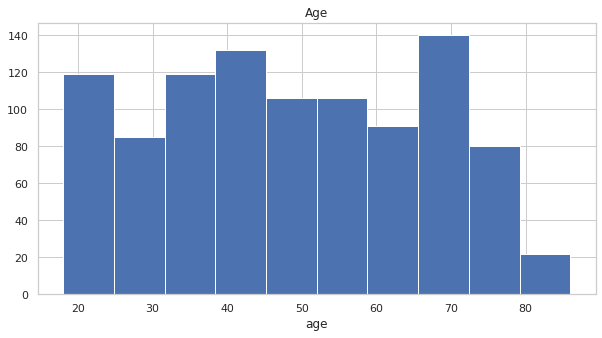

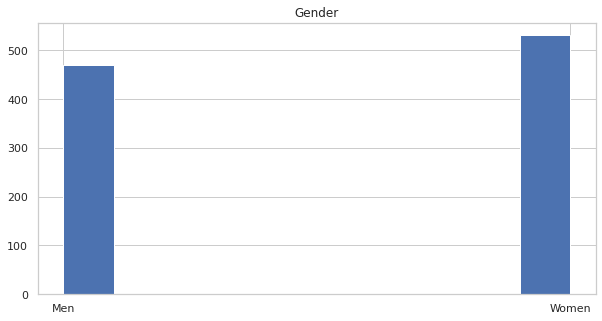

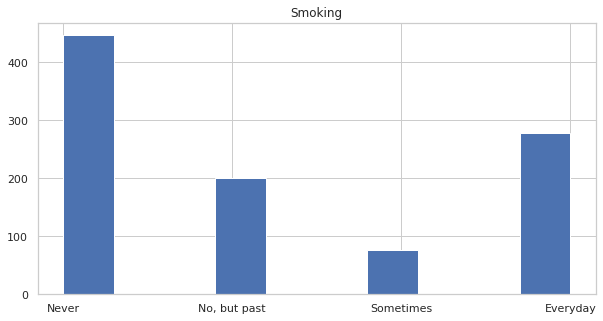

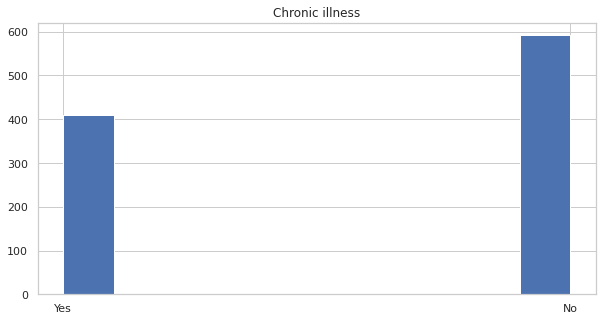

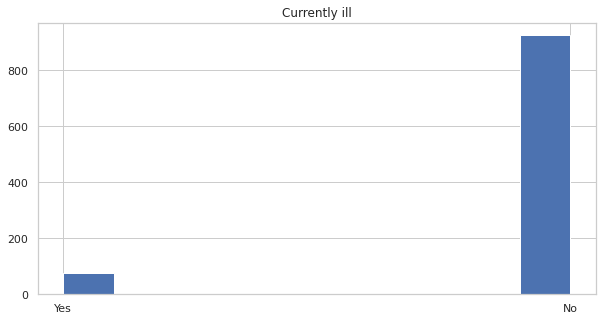

In [10]:
plt.figure(figsize=(10,5))
(2021-df['K1']).hist()
plt.xlabel("age")
plt.title("Age")
plt.show()

plt.figure(figsize=(10,5))
df['nem'].hist()
plt.xticks([1,2], labels=["Men", "Women"])
plt.title("Gender")
plt.show()

plt.figure(figsize=(10,5))
df['K7'].hist()
plt.xticks([1,2,3,4], labels=["Never", "No, but past", "Sometimes", "Everyday"])
plt.title("Smoking")
plt.show()

plt.figure(figsize=(10,5))
df['K8'].hist()
plt.xticks([1,2], labels=["Yes", "No"])
plt.title("Chronic illness")
plt.show()

plt.figure(figsize=(10,5))
df['K9'].hist()
plt.xticks([1,2], labels=["Yes", "No"])
plt.title("Currently ill")
plt.show()

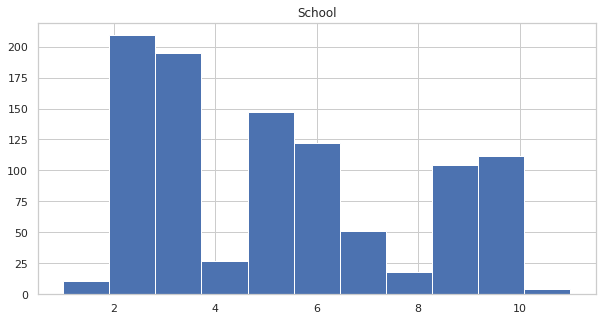

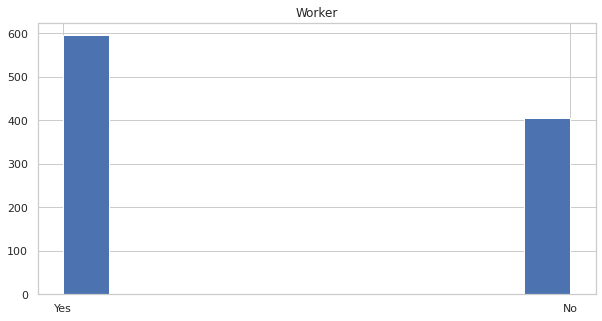

In [11]:
plt.figure(figsize=(10,5))
df['K10'].hist(bins=11)
plt.title("School")
plt.show()

plt.figure(figsize=(10,5))
df['K11'].hist(bins=11)
plt.xticks([1,2], labels=["Yes", "No"])
plt.title("Worker")
plt.show()

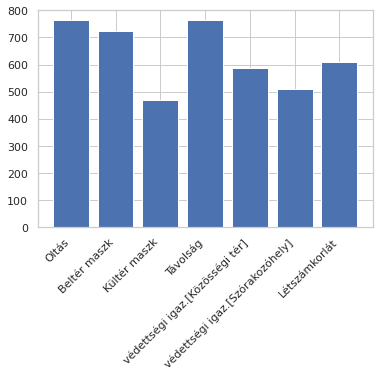

In [12]:
arr = [df["K18_0C{}".format(i)].sum() for i in range(1,8)]
labels=["Oltás", "Beltér maszk", "Kültér maszk", "Távolság", "védettségi igaz.[Közösségi tér]",
        "védettségi igaz.[Szórakozóhely]", "Létszámkorlát"]

plt.bar(range(1,8), arr)
plt.xticks(range(1,8), labels=labels, rotation=45, ha='right')
plt.show()

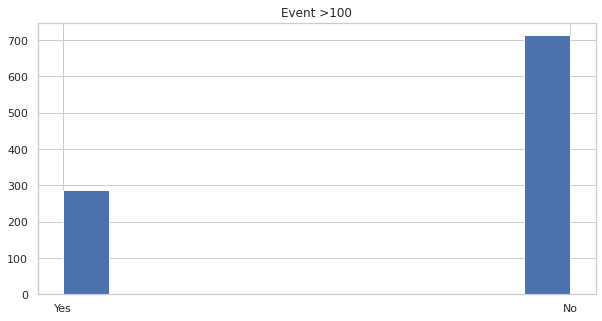

In [13]:
plt.figure(figsize=(10,5))
df['K45'].hist(bins=11)
plt.xticks([1,2], labels=["Yes", "No"])
plt.title("Event >100")
plt.show()

# Covid seriousness

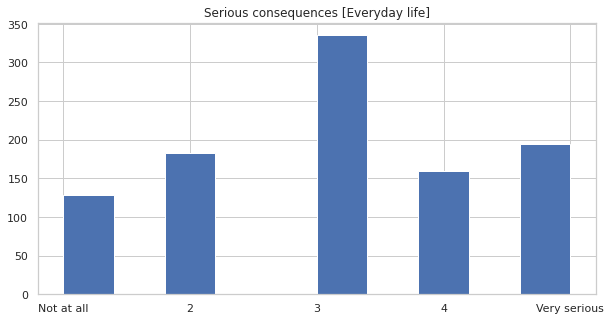

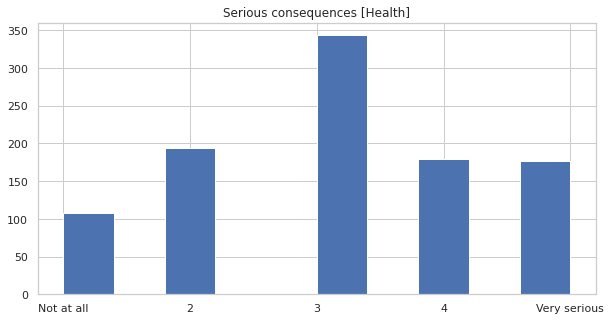

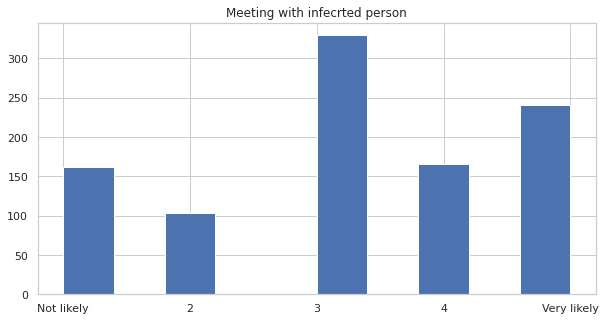

In [14]:
plt.figure(figsize=(10,5))
df['K84'].hist()
plt.xticks([1,2,3,4,5], labels=["Not at all", "2", "3", "4", "Very serious"])
plt.title("Serious consequences [Everyday life]")
plt.show()

plt.figure(figsize=(10,5))
df['K85'].hist()
plt.xticks([1,2,3,4,5], labels=["Not at all", "2", "3", "4", "Very serious"])
plt.title("Serious consequences [Health]")
plt.show()

plt.figure(figsize=(10,5))
df['K86'].hist()
plt.xticks([1,2,3,4,5], labels=["Not likely", "2", "3", "4", "Very likely"])
plt.title("Meeting with infecrted person")
plt.show()

# Protective actions effectivity

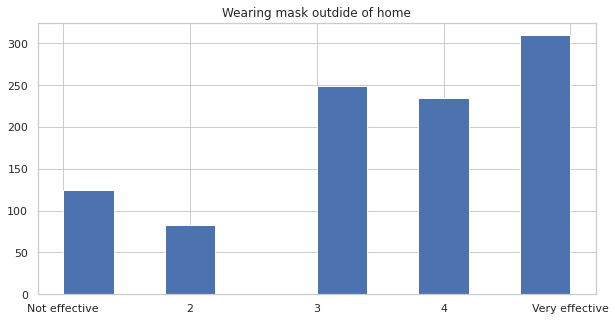

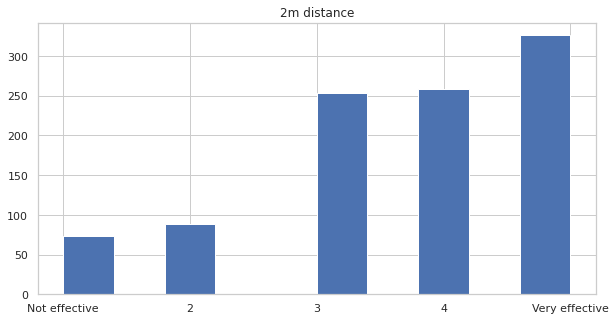

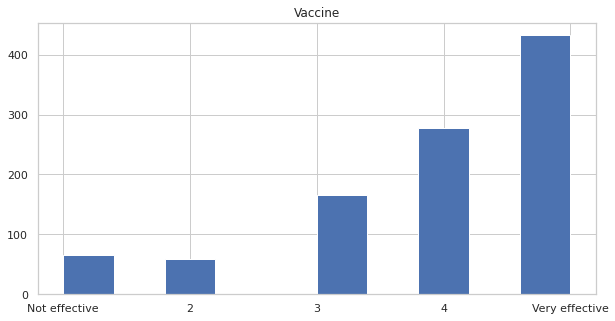

In [15]:
# TODO: barh

plt.figure(figsize=(10,5))
df['K87_01'].hist()
plt.xticks([1,2,3,4,5], labels=["Not effective", "2", "3", "4", "Very effective"])
plt.title("Wearing mask outdide of home")
plt.show()

plt.figure(figsize=(10,5))
df['K87_02'].hist()
plt.xticks([1,2,3,4,5], labels=["Not effective", "2", "3", "4", "Very effective"])
plt.title("2m distance")
plt.show()

plt.figure(figsize=(10,5))
df['K87_03'].hist()
plt.xticks([1,2,3,4,5], labels=["Not effective", "2", "3", "4", "Very effective"])
plt.title("Vaccine")
plt.show()



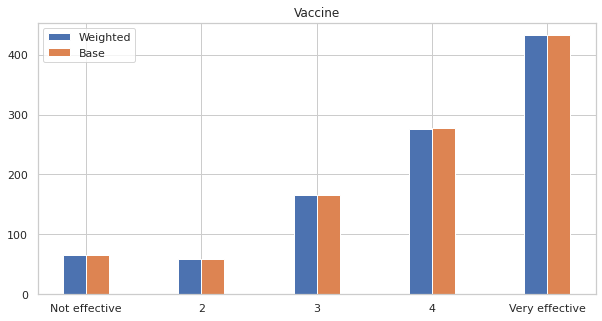

In [16]:
plt.figure(figsize=(10,5))

w= 0.1
x = df.groupby(['K87_03'])['súly'].sum()
plt.bar(x.index-w, x.array, label="Weighted", width = 2*w)

x = df.groupby(['K87_03']).size()
plt.bar(x.index+w, x.array, label="Base", width = 2*w)

plt.xticks([1,2,3,4,5], labels=["Not effective", "2", "3", "4", "Very effective"])
plt.title("Vaccine")
plt.legend()
plt.show()

In [17]:
def bar_feature(df, columns, x_ticks, x_labels, title, labels, figsize=(15,5), rot = 0):
    plt.figure(figsize=figsize)
    
    n = len(columns)
    w = 0.5*(1.0/n)
    for i,(column,label) in enumerate(zip(columns, labels)):
        x = df.groupby([column])['súly'].sum()
        plt.bar(x.index-(((n-1)/2-i))*w, x.array, label=label, width = w)

    plt.xticks(x_ticks, labels=x_labels, rotation=rot, ha='right')
    plt.title(title)
    plt.legend()
    plt.show()

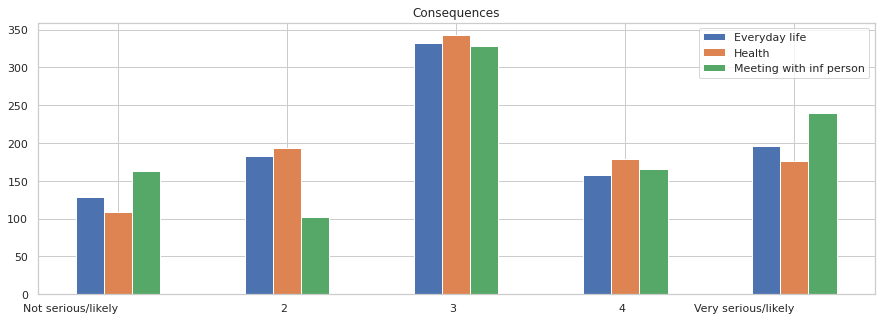

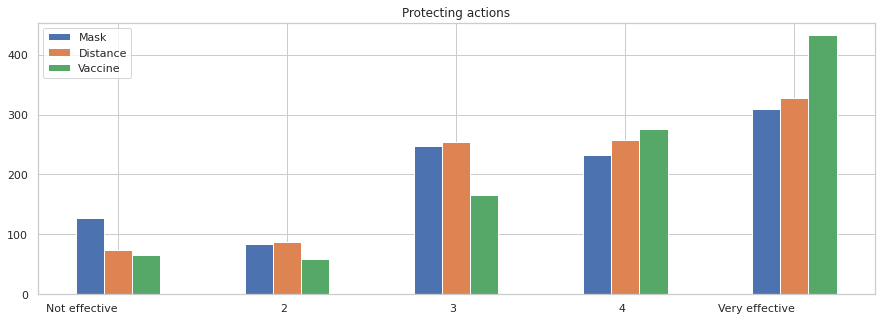

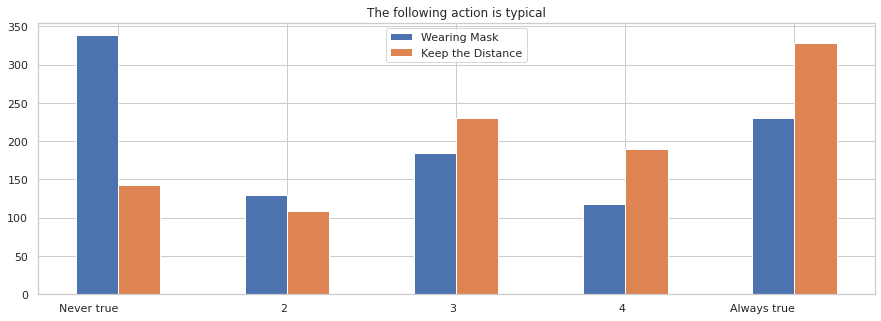

In [18]:
bar_feature(df, ['K84', 'K85', 'K86'],
            x_ticks = [1,2,3,4,5],
            x_labels=["Not serious/likely", "2", "3", "4", "Very serious/likely"],
            title="Consequences",
            labels=['Everyday life', 'Health', "Meeting with inf person"])

bar_feature(df, ['K87_01', 'K87_02', 'K87_03'],
            x_ticks = [1,2,3,4,5],
            x_labels=["Not effective", "2", "3", "4", "Very effective"],
            title="Protecting actions",
            labels=['Mask', 'Distance', "Vaccine"])

bar_feature(df, ['K88_01', 'K88_02'],
            x_ticks = [1,2,3,4,5],
            x_labels=["Never true", "2", "3", "4", "Always true"],
            title="The following action is typical",
            labels=['Wearing Mask', 'Keep the Distance'])

No handles with labels found to put in legend.


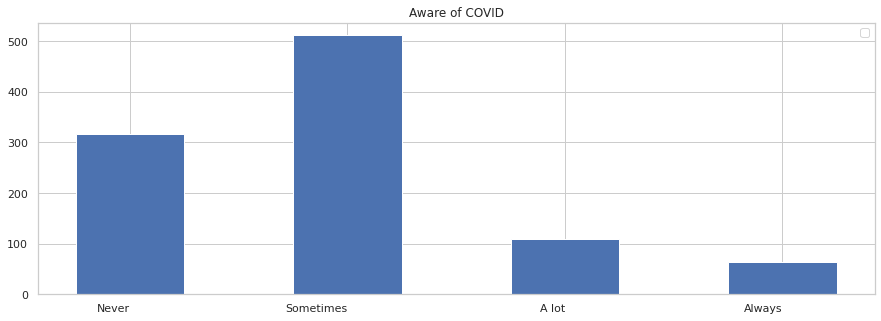

No handles with labels found to put in legend.


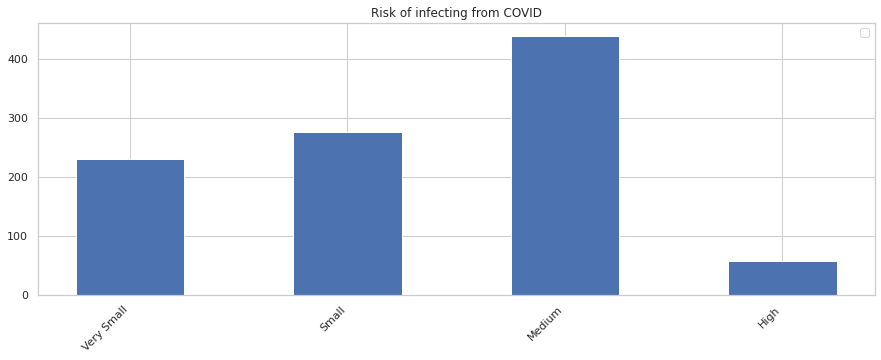

In [19]:
bar_feature(df, ['K89'],
            x_ticks = [1,2,3,4],
            x_labels=["Never", "Sometimes", "A lot", "Always"],
            title="Aware of COVID",
            labels=[None])

bar_feature(df, ['K90'],
            x_ticks = [1,2,3,4],
            x_labels=["Very Small", "Small", "Medium", "High"],
            title="Risk of infecting from COVID",
            labels=[None], rot=45)

# Survey plots

In [20]:
import numpy as np

def survey(results, category_names, figsize=(12,8)):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    #category_colors = plt.get_cmap('RdYlGn')(
    category_colors = plt.get_cmap('seismic')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=figsize)
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.1 else 'black'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 0.95),
              loc='lower left', fontsize='small')

    return fig, ax

def mysurvey(df, Q_key, Q_name, category_names, figsize=(12,8)):
    results = {}
    for key,name in zip(Q_key, Q_name):
        x = df.groupby([key])['súly'].sum()
        results[name]=np.round(100*x.array/np.sum(x.array), decimals=2)
    survey(results, category_names, figsize)

# Protecting actions

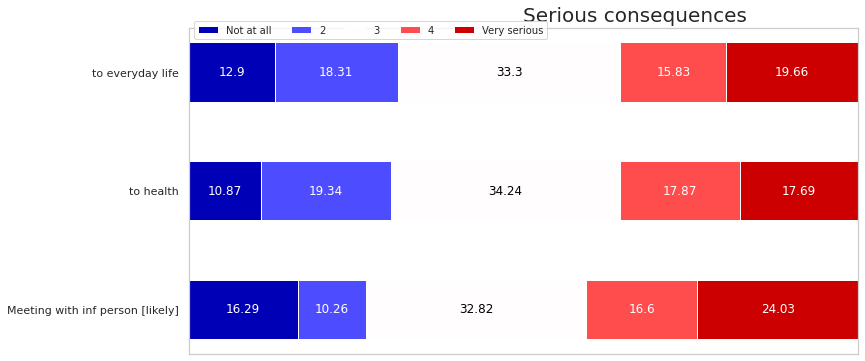

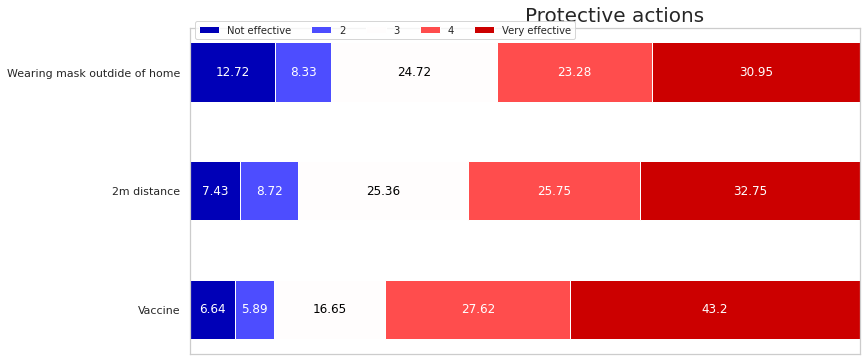

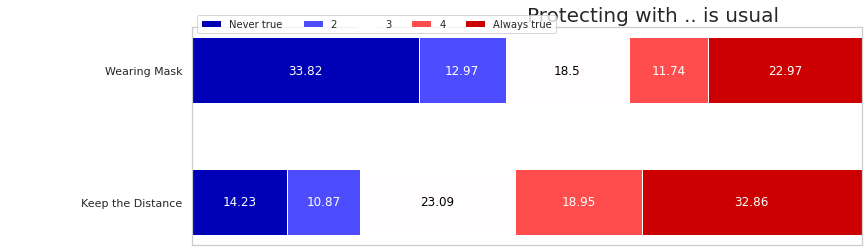

In [21]:
fig=mysurvey(df,
             ['K84', 'K85', 'K86'],
             ["to everyday life", "to health", "Meeting with inf person [likely]"],
             ["Not at all", "2", "3", "4", "Very serious"],figsize=(12,6))

plt.title("Serious consequences", fontsize=20, ha="left")
plt.show()

fig=mysurvey(df,
             ['K87_01', 'K87_02', 'K87_03'],
             ["Wearing mask outdide of home", "2m distance", "Vaccine"],
             ["Not effective", "2", "3", "4", "Very effective"],figsize=(12,6))

plt.title("Protective actions", fontsize=20, ha="left")
plt.show()

fig=mysurvey(df,
             ['K88_01', 'K88_02'],
             ['                            Wearing Mask', 'Keep the Distance'],
             ["Never true", "2", "3", "4", "Always true"],figsize=(12,4))

plt.title("Protecting with .. is usual", fontsize=20, ha="left")
plt.show()

# Awareness

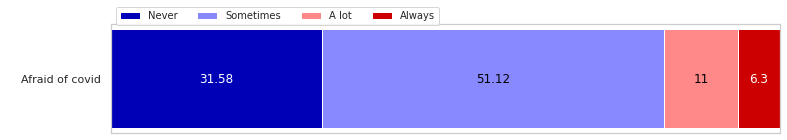

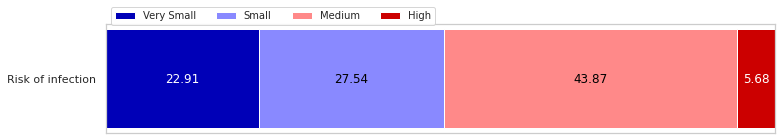

In [22]:
fig=mysurvey(df,
             ['K89'],
             ["    Afraid of covid"],
             ["Never", "Sometimes", "A lot", "Always"],figsize=(12,2))
plt.title("", fontsize=20, ha="left")
plt.show()

fig=mysurvey(df,
             ['K90'],
             ["Risk of infection"],
             ["Very Small", "Small", "Medium", "High"],figsize=(12,2))

plt.title("", fontsize=20, ha="left")
plt.show()

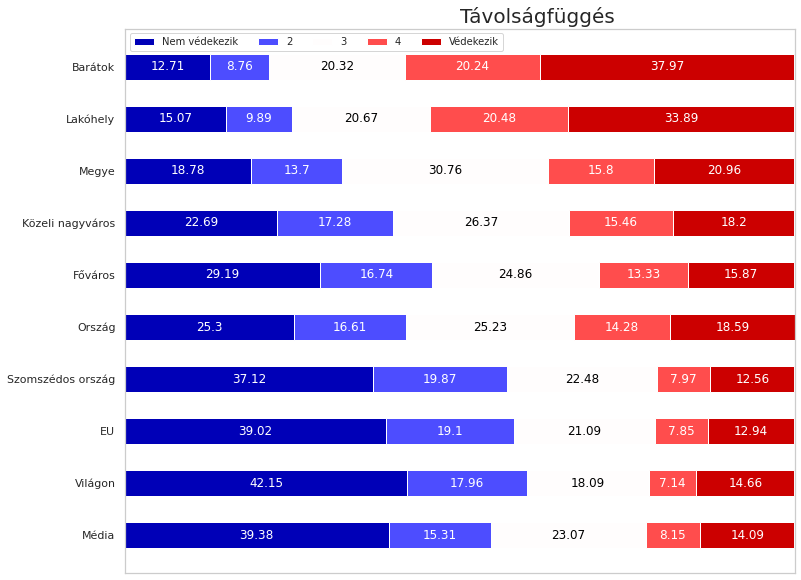

In [23]:
fig=mysurvey(df,
             ['K91_01', 'K91_02', 'K91_03', 'K91_04', 'K91_05', 'K91_06', 'K91_07', 'K91_08' , 'K91_09', 'K91_10'],
             ['Barátok', 'Lakóhely', 'Megye', "Közeli nagyváros", "Főváros", "Ország","Szomszédos ország", "EU", "Világon", "Média"],
             ["Nem védekezik", "2", "3", "4", "Védekezik"],figsize=(12,10))

plt.title("Távolságfüggés", fontsize=20, ha="left")
plt.show()

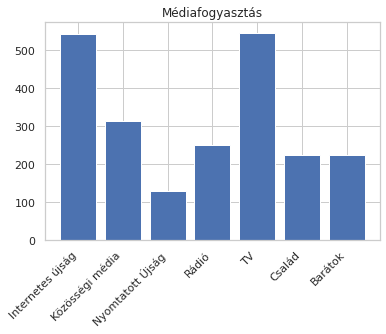

In [24]:
arr = [df["K92C{}".format(i)].sum() for i in range(1,8)]
labels= ["Internetes újság", "Közösségi média", "Nyomtatott Újság", "Rádió", "TV", "Család", "Barátok"]

plt.title("Médiafogyasztás")
plt.bar(range(1,8), arr)
plt.xticks(range(1,8), labels=labels, rotation=45, ha='right')
plt.show()

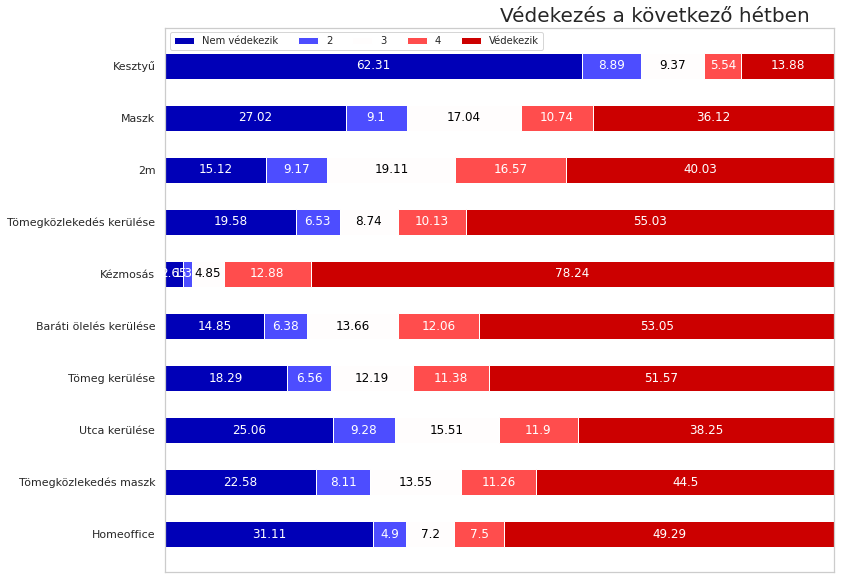

In [25]:
fig=mysurvey(df,
             ["K93_0{}".format(i) for i in range(1,10)]+["K93_11", "K93_12", "K93_13"],
             ['Kesztyű', 'Maszk', '2m', 'Tömegközlekedés kerülése', "Kézmosás", "Baráti ölelés kerülése", "Tömeg kerülése", "Utca kerülése", "Tömegközlekedés maszk", "Homeoffice"],
             ["Nem védekezik", "2", "3", "4", "Védekezik"],figsize=(12,10))

plt.title("Védekezés a következő hétben", fontsize=20, ha="left")
plt.show()

# PCA

In [52]:
features = ["K93_0{}".format(i) for i in range(1,10)]+["K93_11", "K93_12", "K93_13"]+\
        ["K91_0{}".format(i) for i in range(1,10)]+["K91_10"]

In [63]:
import matplotlib
import matplotlib.cm as cm

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


def get_pca(df, features):
    x = df.loc[:, features].values
    x = StandardScaler().fit_transform(x) # normalizing the features

    pca_d = PCA(n_components=2)
    principalComponents = pca_d.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
    
    return principalDf

def scatter(finalDf, key, title):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('pc1', fontsize = 15)
    ax.set_ylabel('pc2', fontsize = 15)
    ax.set_title(title, fontsize = 20)

    minima = 1
    maxima = 5

    norm = matplotlib.colors.Normalize(vmin=minima, vmax=maxima, clip=True)
    mapper = cm.ScalarMappable(norm=norm, cmap=cm.hot)

    sc=ax.scatter(finalDf.loc[:, 'pc1']
               , finalDf.loc[:, 'pc2']
               , c = finalDf[key]
               , vmin=1, vmax=5,cmap=plt.cm.get_cmap('hot')
               , s = 50)
    plt.colorbar(sc)
    ax.grid()
    plt.show()


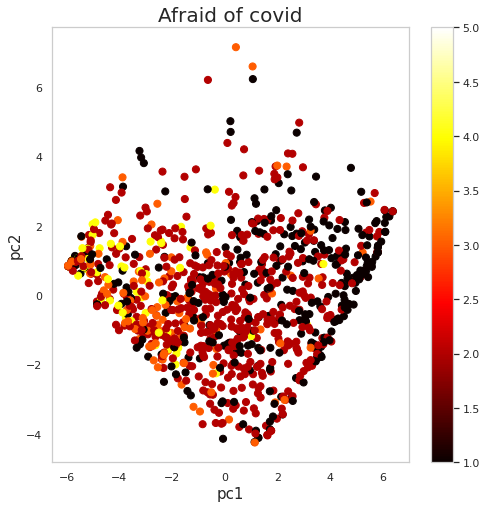

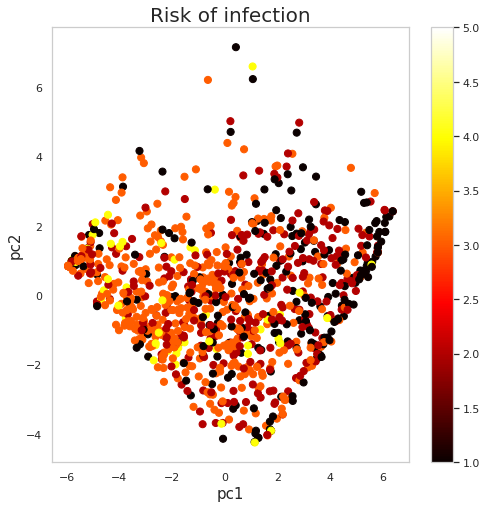

In [66]:
principalDf = get_pca(df, features)
finalDf = pd.concat([principalDf, df[['K89', 'K90']]], axis = 1)

scatter(finalDf, "K89", "Afraid of covid")
scatter(finalDf, "K90", "Risk of infection")

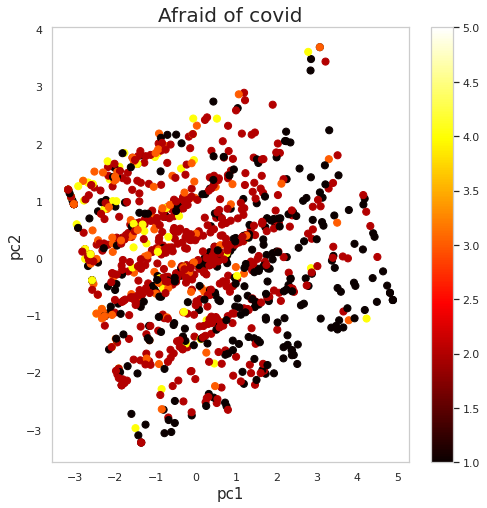

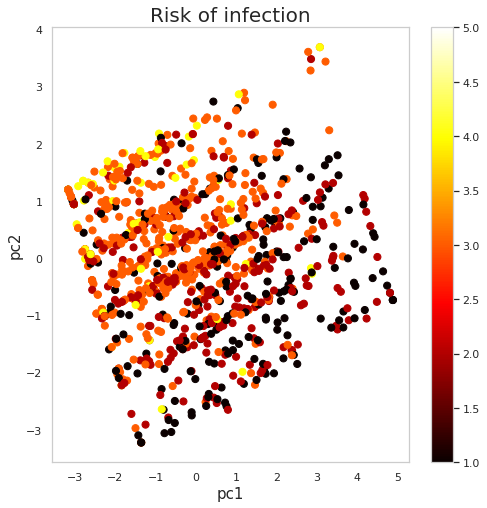

In [112]:
features = ["K84", "K85", "K86", "K87_01", "K87_02", "K87_03", "K88_01", "K88_02"]

principalDf = get_pca(df, features)
finalDf = pd.concat([principalDf, df[['K89', 'K90']]], axis = 1)

scatter(finalDf, "K89", "Afraid of covid")
scatter(finalDf, "K90", "Risk of infection")

1000

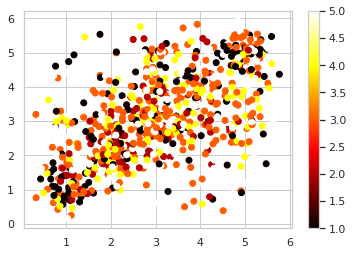

In [84]:
zx=np.random.normal(size=len(df))
zy=np.random.normal(size=len(df))

a = 0.3
sc=plt.scatter(df["K84"]+a*zx, df["K85"]+a*zy, c=df["K86"], vmin=1, vmax=5, cmap=plt.cm.get_cmap('hot'))

plt.colorbar(sc)

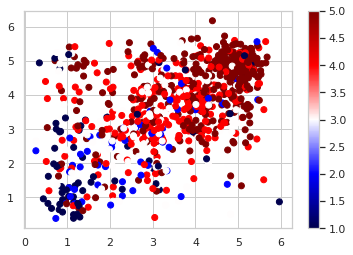

In [87]:
zx=np.random.normal(size=len(df))
zy=np.random.normal(size=len(df))

a = 0.3
sc=plt.scatter(df["K87_01"]+a*zx, df["K87_02"]+a*zy, c=df["K87_03"], vmin=1, vmax=5, cmap=plt.cm.get_cmap('seismic'))

plt.colorbar(sc)

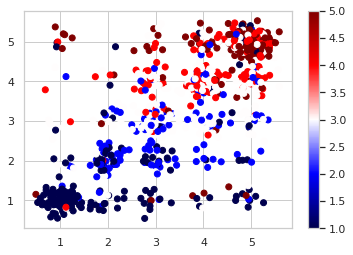

In [113]:
zx=np.random.normal(size=len(df))
zy=np.random.normal(size=len(df))

a = 0.2
sc=plt.scatter(df["K91_01"]+a*zx, df["K91_02"]+a*zy, c=df["K91_03"], vmin=1, vmax=5, cmap=plt.cm.get_cmap('seismic'))
#sc=plt.scatter(df["K91_01"]+a*zx, df["K91_02"]+a*zy, c=df["K87_03"], vmin=1, vmax=5, cmap=plt.cm.get_cmap('seismic'))

plt.colorbar(sc)

<AxesSubplot:>

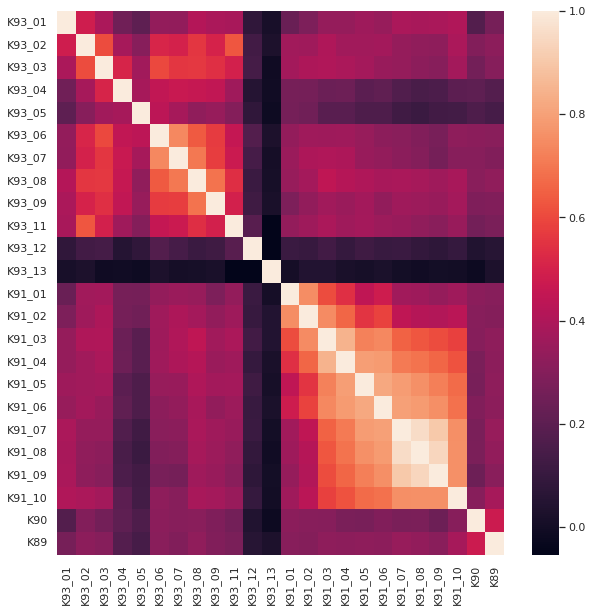

In [38]:
plt.figure(figsize=(10,10))

features = ["K93_0{}".format(i) for i in range(1,10)]+["K93_11", "K93_12", "K93_13"]+\
        ["K91_0{}".format(i) for i in range(1,10)]+["K91_10"]+["K90", "K89"]

# calculate the correlation matrix
corr = df[features].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

<AxesSubplot:>

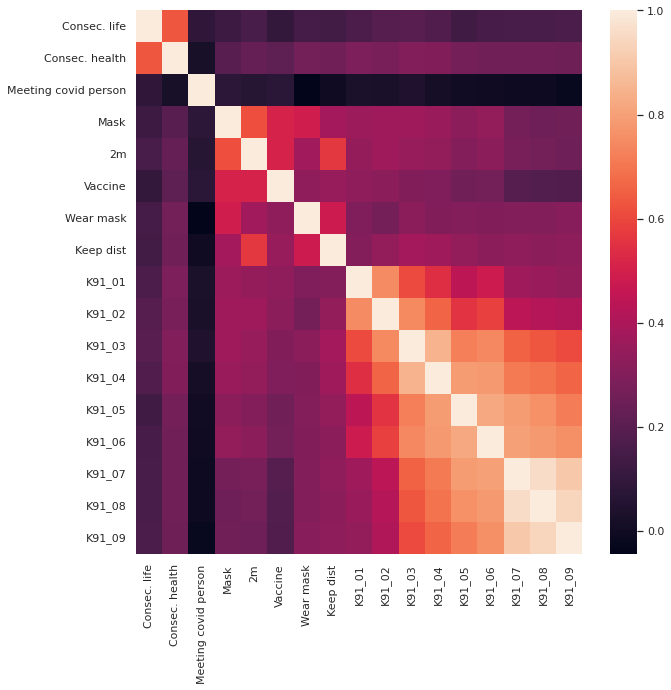

In [39]:
plt.figure(figsize=(10,10))

features = ["K84", "K85", "K86", "K87_01", "K87_02", "K87_03", "K88_01", "K88_02"]+["K91_0{}".format(i) for i in range(1,10)]
labels = ["Consec. life", "Consec. health", "Meeting covid person", "Mask", "2m", "Vaccine", "Wear mask", "Keep dist"]+["K91_0{}".format(i) for i in range(1,10)]
# calculate the correlation matrix
corr = df[features].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=labels,
        yticklabels=labels)

<AxesSubplot:>

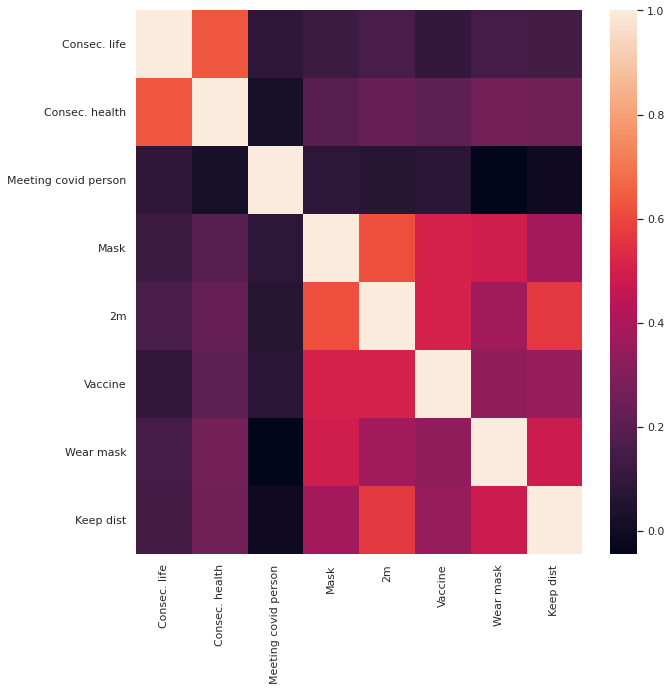

In [40]:
plt.figure(figsize=(10,10))

features = ["K84", "K85", "K86", "K87_01", "K87_02", "K87_03", "K88_01", "K88_02"]
labels = ["Consec. life", "Consec. health", "Meeting covid person", "Mask", "2m", "Vaccine", "Wear mask", "Keep dist"]
# calculate the correlation matrix
corr = df[features].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=labels,
        yticklabels=labels)

# Merging KSH data

In [11]:
print(len(df))
df.head()

1000


,RecordNo,CALLDAY,QUESTDAY,hetk_hetv,DE_COUNT,teltip,DE_REG2,DE_AGEG,K15A,kshkod,...,K93_12,K93_13E,K93_13EO,K93_13,isk,SZUL,kor,súly,súly_hétk,súly_hétv
0,1,20211024,20211024,2,8,2,3,2,Debrecen,15130,...,3,-9998,,-9998,3,19,1,0.978935,,1.08734332861355
1,2,20211024,20211024,2,3,3,1,2,Gyula,5032,...,1,-9998,,-9998,3,19,1,0.994554,,1.06888189624473
2,12,20211024,20211024,2,15,3,3,3,Tiszavasvári,7597,...,2,-9998,,-9998,4,38,2,0.999357,,0.850102755096159
3,14,20211024,20211024,2,17,2,7,5,Szombathely,3009,...,1,-9998,,-9998,3,58,4,0.998004,,0.883055075846983
4,19,20211025,20211025,2,13,1,6,4,Budapest,13578,...,5,-9998,,-9998,4,48,3,0.968952,,0.983300114236723


In [13]:
import pandas as pd
KSH = pd.read_csv("HU_places_admin_pop_ZIP_latlon.csv",
           sep=',',
           header=0)

In [15]:
KSH.head()

,place,KSH code,settlement type,admin county,admin municip,population,zip,latitude,longitude
0,Aba,17376,nagyközség,Fejér,Aba,4619,8127,47.0291,18.5217
1,Abádszalók,12441,város,Jász-Nagykun-Szolnok,Tiszafüred,3922,5241,47.4667,20.6000
2,Abaliget,12548,község,Baranya,Pécs,586,7678,46.1426,18.1168
3,Abasár,24554,község,Heves,Gyöngyös,2498,3261,47.7970,20.0032
4,Abaújalpár,15662,község,Borsod-Abaúj-Zemplén,Encs,76,3882,48.3067,21.2332


In [33]:
extended=pd.merge(df, KSH, left_on="K15A", right_on="place")
print(len(extended))

1000


In [34]:
d = list(KSH['place'])
for i,k in zip(df["K15A"].index, df["K15A"].array):
    if k not in d:
        print(i,k)


In [35]:
df.loc[293][["K15A", "kshkod"]]

K15A      Kömlőd
kshkod     14535
Name: 293, dtype: object

In [36]:
df.loc[195][["K15A", "kshkod"]]

K15A      Bakonyszentlászló
kshkod                 5944
Name: 195, dtype: object

In [37]:
for k in KSH['place'].array:
    if(k[0]=='K'):
        print(k)

Kaba
Kacorlak
Kács
Kacsóta
Kadarkút
Kajárpéc
Kajászó
Kajdacs
Kakasd
Kákics
Kakucs
Kál
Kalaznó
Káld
Kálló
Kallósd
Kállósemjén
Kálmáncsa
Kálmánháza
Kálócfa
Kalocsa
Káloz
Kám
Kamond
Kamut
Kánó
Kántorjánosi
Kány
Kánya
Kányavár
Kapolcs
Kápolna
Kápolnásnyék
Kapoly
Kaposfő
Kaposgyarmat
Kaposhomok
Kaposkeresztúr
Kaposmérő
Kapospula
Kaposújlak
Kaposvár
Kaposszekcső
Kaposszerdahely
Káptalanfa
Káptalantóti
Kapuvár
Kára
Karácsond
Karád
Karakó
Karakószörcsök
Karancsalja
Karancsberény
Karancskeszi
Karancslapujtő
Karancsság
Kárász
Karcag
Karcsa
Kardos
Kardoskút
Karmacs
Károlyháza
Karos
Kartal
Kásád
Kaskantyú
Kastélyosdombó
Kaszaper
Kaszó
Katádfa
Katafa
Kátoly
Katymár
Káva
Kávás
Kazár
Kazincbarcika
Kázsmárk
Kazsok
Kecel
Kecskéd
Kecskemét
Kehidakustány
Kék
Kékcse
Kéked
Kékesd
Kékkút
Kelebia
Keléd
Kelemér
Kéleshalom
Kelevíz
Kemecse
Kemence
Kemendollár
Kemeneshőgyész
Kemeneskápolna
Kemenesmagasi
Kemenesmihályfa
Kemenespálfa
Kemenessömjén
Kemenesszentmárton
Kemenesszentpéter
Keménfa
Kémes
Kemestaródfa
Kem

In [38]:
loc_size=pd.DataFrame(extended.groupby('K15A')['súly'].sum().sort_values(ascending=False))

loc_size=loc_size.merge(KSH, left_on='K15A', right_on='place')
loc_size.head()

,súly,place,KSH code,settlement type,admin county,admin municip,population,zip,latitude,longitude
0,179.200000,Budapest,0,főváros,főváros,Budapest,1740041,1007,47.49801,19.03991
1,55.535768,Debrecen,15130,megyeszékhely-megyei jogú város,Hajdú-Bihar,Debrecen,207594,4000,47.53330,21.63330
2,14.723089,Győr,25584,megyeszékhely-megyei jogú város,Győr-Moson-Sopron,Győr,131564,9011,47.68330,17.63510
3,14.543253,Miskolc,30456,megyeszékhely-megyei jogú város,Borsod-Abaúj-Zemplén,Miskolc,166823,3500,48.10000,20.78330
4,13.324075,Hódmezővásárhely,8314,megyei jogú város,Csongrád,Hódmezővásárhely,46522,6800,46.41670,20.33330


In [47]:
loc_size=pd.DataFrame(extended.groupby('settlement type')['súly'].sum().sort_values(ascending=False))

print(loc_size.sum())
loc_size

súly    1000.0
dtype: float64


,súly
settlement type,
város,297.615542
község,254.519908
főváros,179.200000
megyeszékhely-megyei jogú város,172.100000
nagyközség,58.423850
megyei jogú város,38.140699


In [26]:
import matplotlib.pyplot as plt


x = df[""]
plt.scatter()

{'Budapest': 179.19999999901427,
 'Debrecen': 55.53576765752777,
 'Győr': 14.723088904621818,
 'Miskolc': 14.543252933997445,
 'Hódmezővásárhely': 13.324074616441528,
 'Salgótarján': 10.915679721278726,
 'Kecskemét': 9.40031051600617,
 'Nagykanizsa': 8.324096115835795,
 'Göd': 8.096178756219972,
 'Szombathely': 8.007486984921439,
 'Szekszárd': 7.71765228088015,
 'Veszprém': 7.45732125817247,
 'Sopron': 7.018476233585023,
 'Érd': 6.326225350593189,
 'Orosháza': 6.32059328678544,
 'Hajdúböszörmény': 6.119608546107739,
 'Nyírbátor': 5.996893661278411,
 'Zalaegerszeg': 5.063335014834163,
 'Szentes': 5.0626737765787375,
 'Pécs': 5.047091381138314,
 'Budaörs': 5.019800091471712,
 'Eger': 5.006550233009866,
 'Szigetszentmiklós': 4.972421873633113,
 'Tatabánya': 4.96585456834804,
 'Hajdúnánás': 4.9479485191513515,
 'Fót': 4.917576416557781,
 'Székesfehérvár': 4.860955216810922,
 'Nyíregyháza': 4.827074942703803,
 'Abony': 4.38432032434632,
 'Oroszlány': 4.286398496755631,
 'Csongrád': 4.246173

In [25]:
temp = pd.DataFrame({"code":[12,12,23,45], "name":["A", "KK", "B", "C"]})

code = pd.DataFrame({"code":[12,45,23], "pop":[1000, 10,1]})

In [33]:
pd.merge(temp,code, left_on="code", right_on="code")

,code,name,pop
0,12,A,1000
1,12,KK,1000
2,23,B,1
3,45,C,10


In [19]:
print(df.columns)

Index(['RecordNo', 'CALLDAY', 'QUESTDAY', 'hetk_hetv', 'DE_COUNT', 'teltip',
       'DE_REG2', 'DE_AGEG', 'K15A', 'kshkod',
       ...
       'K93_12', 'K93_13E', 'K93_13EO', 'K93_13', 'isk', 'SZUL', 'kor', 'súly',
       'súly_hétk', 'súly_hétv'],
      dtype='object', length=156)


In [46]:
import numpy as np
pest = ["Budapest"]+["Alsónémedi","Biatorbágy","Budajenő","Budakalász","Budakeszi","Budaörs","Csobánka","Csomád","Csömör","Csörög","Dabas","Délegyháza","Diósd","Dunabogdány","Dunaharaszti","Dunakeszi","Dunavarsány","Ecser","Erdőkertes","Érd","Felsőpakony","Fót","Göd","Gödöllő","Gyál","Gyömrő","Halásztelek","Herceghalom","Inárcs","Isaszeg","Kakucs","Kerepes","Kistarcsa","Kisoroszi","Leányfalu","Majosháza","Maglód","Mogyoród","Monor","Nagykovácsi","Nagytarcsa","Ócsa","Őrbottyán","Páty","Perbál","Pécel","Pilisborosjenő","Piliscsaba","Pilisjászfalu","Pilisszántó","Pilisszentiván","Pilisszentkereszt","Pilisszentlászló","Pilisvörösvár","Pomáz","Pócsmegyer","Pusztazámor","Remeteszőlős","Solymár","Sóskút","Szada","Százhalombatta","Szentendre","Szigethalom","Szigetmonostor","Szigetszentmiklós","Sződ","Sződliget","Tahitótfalu","Taksony","Tárnok","Telki","Tinnye","Tök","Tököl","Törökbálint","Újhartyán","Újlengyel","Üllő","Üröm","Vác","Vácrátót","Vecsés","Veresegyház","Visegrád","Zsámbék"]
no_pest = [k for k in set(df["K15A"].array) if k not in pest]
pest = [k for k in set(df["K15A"].array) if k in pest]

centralHun = pd.DataFrame({
    "central":np.concatenate((np.ones(len(pest), dtype=int), np.zeros(len(no_pest), dtype=int))),
    "K15A":pest+no_pest
})
len(pest),len(no_pest),len(set(df["K15A"].array))

(43, 404, 447)

In [52]:
df=df.merge(centralHun, on="K15A")

In [54]:
df.groupby(["central"])["súly"].sum()

central
0    728.398575
1    271.601425
Name: súly, dtype: float64